<a href="https://colab.research.google.com/github/Rice-from-data/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1_Ned_Horsey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [21]:
# TODO

import pandas as pd

# Create URL  filepath
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'


# read in df and add column names
df = pd.read_csv(url, names = ["age", "op_year", "nodes", "status"])

# I ran all of these checks below and found no nans, also the dtypes all came back as int64 so there are no strings hidden in the columns

# print(df.isnull().sum())
# print(df.isna().sum())
# df.dtypes

# I will recode the status variable to a binary number
s_to_b = {1 : 1, 2 : 0}

df_clean = df
df_clean['status'].replace(s_to_b, inplace=True)
# df_clean.dtypes
# df_clean['status']

print(df_clean.shape)

# View the first five rows
df_clean.head(5)

(306, 4)


,age,op_year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


The shape and year is correct, as there are 306 instances listed in the UCI description and 3( or 4?) features listed there that corespond to the data listed.

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [34]:
# First I'll get a general description of the dataset

df_clean.describe()

,age,op_year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


This description tells me that age is distributed accross 30 to 83 years old, which means that it could be a confounding variable with status since operation recovery might be tied to both severity of the cancer (n_nodes is a standin variable for severity) and age since age is related to the body's ability to recover from trauma.

The number of nodes seems to be have an interesting distribution with a max value of 52, which is about 7x the standard deviation. I'll look into that below.

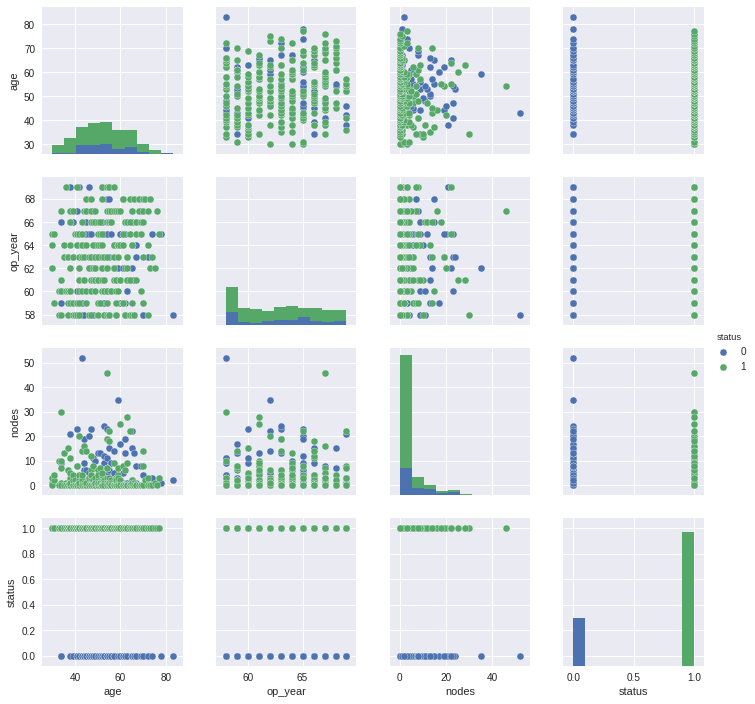

In [22]:
# TODO

# I'm going to do some pairplotting to quickly get a sense of feature relationships
import seaborn as sns

sns.pairplot(df_clean, hue= 'status')


This doesn't over any obvious relationships to me, so I'm going to try graphing the nodes distribution.

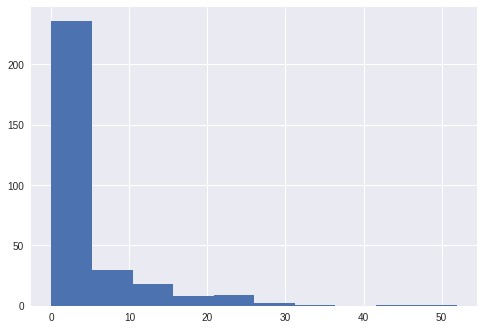

In [35]:
df_clean['nodes'].hist()

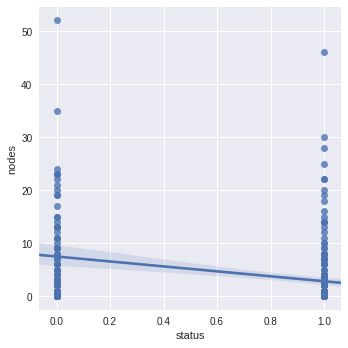

In [41]:
# Interesting, so the number of nodes is highly skewed to the left side of the chart, meaning, most patients have relatively few or no nodes, but a few instances have a large number, I'm going to graph this relative to survival

sns.lmplot(x='status', y='nodes', data=df_clean)

So there is a slight relationship between more nodes and a higher chance of status being 0.

In [33]:
# I'm going to try grouping by op year

op_bins = pd.cut(df_clean['op_year'], 5)  # 5 equal-sized bins
pd.crosstab(df_clean['status'], op_bins, normalize='index')



# sns.swarmplot(x='', y='', data=df)

op_year,"(57.989, 60.2]","(60.2, 62.4]","(62.4, 64.6]","(64.6, 66.8]","(66.8, 69.0]"
status,,,,,
0,0.308642,0.123457,0.197531,0.234568,0.135802
1,0.293333,0.173333,0.200000,0.164444,0.168889


To me, this doesn't seem to provide much insight, certain op_year periods result in higher mortality (status = 0), but this is probably not strongly related to the outcome.

I'll try grouping by age bins and see what happens.

In [45]:
# now I'm grouping status by age

age_bins = pd.cut(df_clean['age'], 5)  # 5 equal-sized bins
pd.crosstab(df_clean['status'], age_bins, normalize='index')

age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
status,,,,,
0,0.049383,0.382716,0.333333,0.197531,0.037037
1,0.173333,0.302222,0.306667,0.191111,0.026667


This is a little surprising, the highest percentage of deaths occur in the 40-51 and 51-61 bins. I wonder if this is due to the number of operations during this period, it could be that this cancer manifests mostly in that age range. I'll come back to this later if there's time.

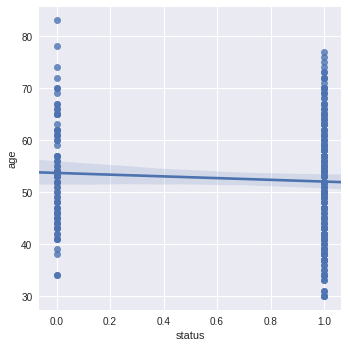

In [52]:
sns.lmplot(x='status', y='age', data=df_clean)

Now I want to explore the relationship between node counts and age.

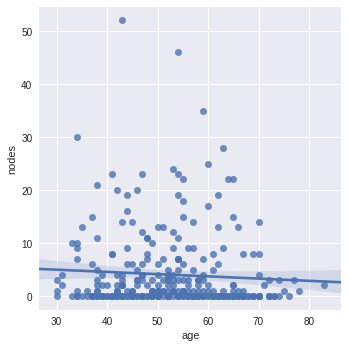

In [56]:
sns.lmplot(x='age', y='nodes', data=df_clean)



This is interesting, since it seems to show that high node counts are negatively correlated with age. This might mean that higher node counts result in early mortality. 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1) Lower node counts seem to have a positive relationship with status, see below chart.



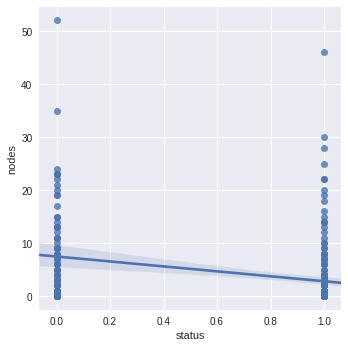

In [53]:
sns.lmplot(x='status', y='nodes', data=df_clean)

2) higher age seems to have a mildly negative relationship with survival

(see below)

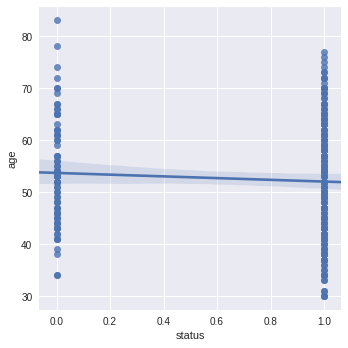

In [54]:
sns.lmplot(x='status', y='age', data=df_clean)

3) The problem is that higher age might also be correlated with higher node counts, and these correlations are quite flat (weak), so I don't think I've achieved much predictive capability yet. 

Given that the papers relating to this dataset all mention logistic regression, I think that is the toolset needed to more fully explore the relationships in this data.